---

# 2. Regular Languages
**[Emil Sekerinski](http://www.cas.mcmaster.ca/~emil/), McMaster University, January 2026**

---

### Regular Expressions

Regular expressions are closely related to regular languages and finite state automata.

The _regular expressions_ over a set `Σ` of symbols consist of

- any symbol `a ∈ Σ ∪ {ε}`,
- `E₁ | E₂`, where `E₁`, `E₂` are regular expressions (*choice*),
- `E₁ E₂`, where `E₁`, `E₂` are regular expressions (*concatenation*),
- `E*`, where `E` is a regular expression (*repetition*).

It is assumed that `ε ∉ Σ`. The operator for repetition is also called the Kleene star. Using EBNF, the abstract syntax of regular expressions is:

    E → 'ε' | Σ | E '|' E | E E | E '*'

When writing regular expressions, parentheses are used for grouping. By convention, repetition binds tighter than concatenation, which binds tighter than choice. That is, `ab*|c` is understood as `(a(b*))|c`. 

The language `L(E)` _described_ by regular expression `E` over set `T` of symbols is defined recursively over the structure of `E`. Assuming `a ∈ Σ ∪ {ε}` and `E`, `E₁`, `E₂` are regular expressions,

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  

 `L(ab*|c)`  
`=  L(ab*) ∪ L(c)`  
`=  (L(a) L(b*)) ∪ L(c)`  
`=  ({a} (⋃ n ≥ 0 • Lⁿ(b))) ∪ {c}`  
`=  ({a} (⋃ n ≥ 0 • {b}ⁿ)) ∪ {c}`  
`=  (⋃ n ≥ 0 • {a}{b}ⁿ) ∪ {c}`  
</div>

| E | L(E)          |
|:-------------------|:------------------|
| `a`                | `{a}`             |
| `E₁│E₂`          | `L(E₁) ∪ L(E₂)`   |
| `E₁ E₂`            | `L(E₁) L(E₂)`     |
| `E*`               | `⋃ n ≥ 0 • Lⁿ(E)` |

where for sets `A`, `B` of sequences over `T`:

  `A B = {αβ | α ∈ A ∧ β ∈ B}`  
  `A⁰ = {ε}`  
  `Aⁿ = A Aⁿ⁻¹, n > 0`

Above, `ε` is the empty sequence, which is distinct from `ε` in a regular expression. For example, if `U = {u, v}` and `X = {x, y}`, then `U X = {ux, uy, vx, vy}`. Since `A¹ = A A⁰ = A {ε} = A`:

    L(E*) = {ε} ∪ L(E) ∪ L²(E) ∪ …

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  

 `L([a | b])`  
`=  {ε} ∪ L(a | b)`  
`=  {ε} ∪ L(a) ∪ L(b)`  
`=  {ε} ∪ {a} ∪ {b}`  
`=  {ε, a, b}`
</div>

The notation `[E] = ε | E` is used to avoid writing `ε`. Consequently:

  `L([E]) = {ε} ∪ L(E)`

Sometimes `{E} = E*` is used, as in EBNF.

**Question.** What language does `[a a*]` describe? How can the expression be simplified? Give a formal proof!

_Answer._

       L([a a*])
    =  {ε} ∪ L(a a*)
    =  {ε} ∪ (L(a) L(a*))
    =  {ε} ∪ ({a} (⋃ n ≥ 0 • Lⁿ(a)))
    =  {ε} ∪ ({a} (⋃ n ≥ 0 • {a}ⁿ))
    =  {ε} ∪ (⋃ n ≥ 0 • {a}{a}ⁿ)
    =  {a}⁰ ∪ (⋃ n > 0 • {a}ⁿ)
    =  ⋃ n ≥ 0 • {a}ⁿ
    =  ⋃ n ≥ 0 • L(a)ⁿ
    =  L(a*)

That is, `[a a*]` describes the same language as `a*`.

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  Taking `ab*|c`,  
  
 `L(ab*|c) = L(G)`  
  
where `G = (T, N, S, P}`  
with `T = {a, b, c}`, `N = {S}`,  
and `P = {S → a{b}|c}`
</div>

The similarity in the notation of regular expressions and productions in EBNF is justified by the following theorem, given without proof:

**Theorem.** For regular expression `E` over `Σ` and grammar `G` with the single non-recursive production `S → E`, the language described by `E` and the language generated by `G` are the same, `L(E) = L(G)`.

For regular expressions, equivalence is of fundamental importance. Regular expressions `E`, `E'` are *equal*, `E = E'`, if `L(E) = L(E')`; that is, a regular expression is identified with the set of sentences it describes. Given regular expressions `E`, `F`, `G` , the basic rules of choice and concatenation are:

- *Identity:* `E ε = ε E = E`
- *Idempotence:* `E | E = E`
- *Commutativity:* `E | F = F | E`
- *Associativity:* `(E F) G = E (F G)`
- *Associativity:* `(E | F) | G = E | (F | G)`
- *Distributivity:* `E (F | G) = E F | E G` and `(E | F) G = E G | F G`

Some of the basic rules of `*` are:
- `E* = [E E*]`
- `E E* = E* E`
- `E** = E*`
- `E* E* = E*`
- `(E | F)* = E* (F E*)*`
- `(E F)* E = E (F E)*`

Here is the proof of `E | F = F | E`:

        L(E | F)
    =  L(E) ∪ L(F)
    =  L(F) ∪ L(E)
    =  L(F | E)

That is, the proof of the commutativity of choice relies on the commutativity of union. Here is the proof of `E (F | G) = E F | E G`:

        L(E (F | G))
    =  L(E) L(F | G)
    =  L(E) (L(F) ∪ L(G))
    =  L(E) {b | b ∈ L(F) ∨ b ∈ L(G)}
    =  {a b | a ∈ L(E) ∧ (b ∈ L(F) ∨ b ∈ L(G))}
    =  {a b | (a ∈ L(E) ∧ b ∈ L(F)) ∨ (a ∈ L(E) ∧ b ∈ L(G))}
    =  {a b | a ∈ L(E) ∧ b ∈ L(F)} ∪ {a b | a ∈ L(E) ∧ b ∈ L(G)}
    =  L(E F) ∪ L(E G)
    =  L(E F | E G)

That is, the proof of distributivity of concatenation over choice relies on the distributivity of conjunction over disjunction.

*Aside.* If one adds `∅` with `L(∅) = {}` as the empty language, the regular expressions form a [Kleene algebra](https://en.wikipedia.org/wiki/Kleene_algebra) with following properties of `∅`:

- *Identity:* `E | ∅ = ∅ | E = E`
- *Annihilation:* `E ∅ = ∅ E = ∅`

Having `∅` in regular expressions for searching text is not intuitive and is not used. However, Kleene algebras have applications to programming, with `∅`, `ε` corresponding to `stop`, `skip` and with concatenation, choice, and repetition (star) corresponding to sequential composition, nondeterministic choice, and repetition. In that case, the underlying model is that of relations, with sequential composition being relational composition and nondeterministic choice being union. _Kleene algebras with tests_ distinguish between statements and guards (tests) and allow while-programs to be expressed; see Kozen's tutorial [Part 1](https://www.cl.cam.ac.uk/events/ramics13/KozenTutorial1.pdf) and [Part 2](https://www.cl.cam.ac.uk/events/ramics13/KozenTutorial2.pdf).

In Python, we use classes to construct regular expressions: constructors `Sym(a)`, `Choice(E₁, E₂)`, `Conc(E₁, E₂)`, and `Star(E)` create objects that represent `a`, `E₁ | E₂`, `E₁ E₂`, and `E*`, respectively:

In [ ]:
class RegEx:
  pass


class ε(RegEx):
  def __repr__(self):
    return 'ε'


class Sym(RegEx):
  def __init__(self, a: str):
    self.a = a

  def __repr__(self):
    return str(self.a)


class Choice(RegEx):
  def __init__(self, E1: RegEx, E2: RegEx):
    self.E1, self.E2 = E1, E2

  def __repr__(self):
    return '(' + str(self.E1) + '|' + str(self.E2) + ')'


class Conc(RegEx):
  def __init__(self, E1: RegEx, E2: RegEx):
    self.E1, self.E2 = E1, E2

  def __repr__(self):
    return '(' + str(self.E1) + str(self.E2) + ')'


class Star(RegEx):
  def __init__(self, E: RegEx):
    self.E = E

  def __repr__(self):
    return '(' + str(self.E) + ')*'

Symbols are represented by characters, with `''` representing `ε`. For example, `(ab)*|c` is represented as:

In [ ]:
E1 = Choice(Star(Conc(Sym('a'), Sym('b'))), Sym('c'))
E1

### Regular Grammar to Regular Expression

For every regular grammar `G`, we can construct a regular expression `E` such that `L(G) = L(E)` by transforming the productions of the grammar. The assumption is that the grammar is in BNF, with one production for everyone nonterminal, including one for the start symbol `S`. The grammar is transformed by several steps with intermediate grammars in EBNF. An EBNF production of the form

    A → E A | F

where `A` does not occur in `E`, `F`, is equivalent to (*Arden's Rule*)

    A → E* F

which can be used to replace `A` with `E* F` in all other productions. This is repeated until a single production for `S` is left, whose right-hand side is the equivalent regular expression.

**Example.** Given regular grammar with productions

    S → a | b X      X → b X | c Y      Y → c

first, the last production can be eliminated by replacing `Y` with `c` in all other productions:

    S → a | b X      X → b X | c c

An equivalent production for `X` is `X → b* c c`, which allows `X` to be replaced by `b* c c`:

    S → a | b b* c c

Thus, an equivalent regular expression is `a | bᐩ c c`.

**Question.** What is an equivalent regular expression for the grammar with productions:

    S → a S | b X
    X → a X | b Y | a
    Y → a Y | a

_Answer._

    S → a S | b X      X → a X | b Y | a      Y → a Y | a

An equivalent production for `Y` is `Y → a* a`, which allows `Y` to be replaced by `aᐩ`:

    S → a S | b X      X → a X | b aᐩ | a

The production for `X` can be written as `X → a X | (b aᐩ | a)`, which matches the form that is needed for it to be rewritten as `X → a* (b aᐩ | a)`, which in turn allows `X` to be eliminated from the other productions:

    S → a S | b (a* (b aᐩ | a))

Now, `S` can be equivalently defined by `S → a* b (a* (b aᐩ | a))`. The regular expression equivalent to the grammar is therefore:

    a* b (a* (b aᐩ | a))

### Finite State Automata

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.** `A₀ = (Σ, Q, I, δ, F)`  
with `Σ = {a, b, c}`, `Q = {q₀, q₁, q₂}`,  
`I = {q₀}`, `F = {q₂}`, and `δ`:  
`    q₀ a → q₁`  
`    q₁ b → q₁`  
`    q₁ c → q₂`  
`    q₀ c → q₂`  
This defines `δ` as:  
`    δ q₀ a = {q₁}`  
`    δ q₀ c = {q₂}`  
`    δ q₁ b = {q₁}`  
`    δ q₁ c = {q₂}`  
`δ` is undefined for all other states  
and input symbols.

</div>

A finite state automaton `A = (Σ, Q, I, δ, F)` is specified by
- a finite set `Σ` of *(input) symbols*,
- a finite set `Q` of *states*,
- a set of _initial states_ `I ⊆ Q`,
- a *transition function*, `δ: Q ↛ Σ ↛ 𝒫Q`,
- a set of _final states_ `F ⊆ Q`.

The transition function is *partial* function from states and symbols to sets of states; `X ↛ Y` stands for partial functions from `X` to `Y`. A triple written as `p a → q` is a *transition* if `q ∈ δ a p` for `p, q ∈ Q` and `a ∈ Σ`. The transition function can be specified as a set of such transitions, for example, as in `A₀` to the right.

A finite state automaton is given a sequence `α ∈ Σ*` as input and starts in any initial state. A transition `p a → q` allows it to move from state `p` to state `q` while consuming symbol `a` from the input.

A finite state automaton with *`ε`-transitions* allows transitions on a dedicated symbol `ε ∈ Σ`; its input sequences are `(Σ - {ε})*`.

The components of `A = (Σ, Q, I, δ, F)` are referred to by `A.Σ`, `A.Q`, `A.I`, `A.δ`, and `A.F`.

<img style="width:16em;float:right" src="./img/A0.svg"></img>
Finite state automata can be graphically represented by *finite state diagrams*:
- States are enclosed in a circle.
- Transitions are arrows between states labelled with a symbol.
- Arrows point to the initial states.
- Each final state is enclosed in a double circle.

With the execution of finite state automata in mind, we define a Python class `FiniteStateAutomaton` and a procedure `parseFSA` for creating a `FiniteStateAutomaton` object from a textual representation of the following form:

    initial, initial, ...
    source symbol → target
    source symbol → target
    final, final, ...
    ...

The vocabulary becomes all the symbols that appear in the transitions. The set of states becomes all the initial states, final states, and states mentioned in transitions. Empty lines are allowed. Symbols and states are non-empty strings without spaces. Later on, sets of sets of states will be considered. Python does not allow a `set` object with `set` elements to be constructed: elements must have a hash method defined for fast checking of membership, but that is only defined for immutable data types like `str` and `frozenset`, not for `set`. Therefore, `frozenset` is used for states. As the textual representation of `frozenset` objects is verbose, we define our variant that makes frozen sets textually look like sets:

In [ ]:
class fset(frozenset):
  def __repr__(self):
    return '{' + ', '.join(str(e) for e in self) + '}'

In [ ]:
def wrap(a):
  import textwrap

  return '\\n'.join(textwrap.wrap(str(a), width=12))


TransFunc = dict[str, dict[str, set[str]]]


class FiniteStateAutomaton:
  Σ: set[str]  # set of symbols
  Q: set[str]  # set of states
  I: set[str]  # I ⊆ Q, the initial states,
  δ: TransFunc  # representing Q ↛ Σ ↛ 𝒫Q, the transition function
  F: set[str]  # F ⊆ Q, the finite states
  vars = ()  # for reduced FSAs, the names of the original variables

  def __init__(self, Σ, Q, I, δ, F):
    self.Σ, self.Q, self.I, self.δ, self.F = Σ, fset(Q), fset(I), δ, fset(F)

  def draw(self, trace=None):
    from graphviz import Digraph

    dot = Digraph(
      graph_attr={'rankdir': 'LR'},
      node_attr={
        'fontsize': '10',
        'fontname': 'Noto Sans',
        'margin': '0',
        'width': '0.25',
      },  # 'nodesep': '0.75', 'ranksep': '0.75'
      edge_attr={'fontsize': '10', 'fontname': 'Noto Sans', 'arrowsize': '0.5'},
    )  # 'weight': '5.0' # create a directed graph
    for q in self.I:
      dot.node('_' + str(q), label='', shape='none', height='.0', width='.0')
      dot.node(wrap(q), shape='circle')
      dot.edge('_' + str(q), wrap(q), len='.1')
    P = self.I | self.F
    for q in self.δ:
      P = P | {q}
      for a in self.δ[q]:
        dot.node(wrap(q), shape='circle')
        for r in self.δ[q][a]:
          dot.node(wrap(r), shape='circle')
          dot.edge(wrap(q), wrap(r), label=str(a))
          P = P | {r}
    for q in self.F:
      dot.node(wrap(q), shape='doublecircle')
    for q in self.Q - P:  # place all unreachable nodes to the right
      dot.node(wrap(q), shape='circle')
      for p in P:
        dot.edge(wrap(p), wrap(q), style='invis')  # , constraint='false'
    if trace:
      xlab = {}  # maps states to Graphviz external labels
      for i in range(0, len(trace), 2):
        xlab[trace[i]] = xlab[trace[i]] + ', ' + str(i // 2) if trace[i] in xlab else str(i // 2)
      for q in xlab:
        dot.node(wrap(q), xlabel='<<font color="royalblue">' + wrap(xlab[q]) + '</font>>')
    return dot

  def writepdf(self, name, trace=None):
    open(name, 'wb').write(self.draw(trace).pipe(format='pdf'))

  def writesvg(self, name, trace=None):
    open(name, 'wb').write(self.draw(trace).pipe(format='svg'))

  def __repr__(self):
    return (
      ' '.join(str(q) for q in self.I)
      + '\n'
      + '\n'.join(
        str(q) + ' ' + str(a) + ' → ' + ', '.join(str(r) for r in self.δ[q][a])
        for q in self.δ
        for a in self.δ[q]
        if self.δ[q][a] != set()
      )
      + '\n'
      + ' '.join(str(f) for f in self.F)
      + '\n'
    )


def parseFSA(fsa: str) -> FiniteStateAutomaton:
  fl = [line for line in fsa.split('\n') if line != '']
  I = set(fl[0].split()) if len(fl) > 0 else set()  # second line: initial initial ...
  Σ, Q, δ, F = set(), set(), {}, set()
  for line in fl[1:]:  # all subsequent lines
    if '→' in line:  # source action → target
      l, r = line.split('→')
      p, a, q = l.split()[0], l.split()[1], r.split()[0]
      if p in δ:
        s = δ[p]
        s[a] = s[a] | {q} if a in s else {q}
      else:
        δ[p] = {a: {q}}
      Σ.add(a)
      Q.add(p)
      Q.add(q)
    else:  # a line without → is assumed to have the final states
      F = set(line.split()) if len(line) > 0 else set()  # final final ...
  return FiniteStateAutomaton(Σ, Q | I | F, I, δ, F)

The method `__repr__` is called when an object is printed; it prints an automaton in the same format as `parseFSA` expects as input.

 For example, for `A₀` as earlier:

In [ ]:
A0 = parseFSA("""
q₀
q₀ a → q₁
q₀ c → q₂
q₁ b → q₁
q₁ c → q₂
q₂
""")
A0

The method `draw` uses the automatic layout of GraphViz to display an automaton from left to right.

In [ ]:
A0.draw()

Given transition function `δ: Q ↛ Σ ↛ 𝒫Q`, the extension `δ̂: 𝒫Q ↛ Σ ↛ 𝒫Q` to a set of states is defined by:

    δ̂ P a = (∪ p ∈ P • δ p a)

For example:

    A₀.δ̂ ∅ a = ∅
    A₀.δ̂ {q₁} c = {q₂}
    A₀.δ̂ {q₀, q₁} b = {q₁}

The equality `δ̂ P a = Q` is also written as `P a ⇒ Q`, provided `δ` is understood from the context. With an implementation in mind, we mainly use the notation that explicitly mentions `δ`.

Python does not allow a combining operator like ` ̂` to be defined; instead, we define a function `δ̂` that takes `δ` as a parameter. As `set.union` does not support the union of an empty set of sets, we define our own generalized set union:

In [ ]:
def setunion(S: set[set]) -> set:
  return set.union(set(), *S)


def δ̂(δ: TransFunc, P: set[str], a: str) -> set[str]:
  return fset(setunion(δ[p][a] for p in P if p in δ if a in δ[p]))

In [ ]:
A0.draw()

For example:

In [ ]:
assert δ̂(A0.δ, set(), 'a') == set()
assert δ̂(A0.δ, {'q₁'}, 'c') == {'q₂'}
assert δ̂(A0.δ, {'q₀', 'q₁'}, 'b') == {'q₁'}

The *ε-closure* of a set `Q` of states are states that are reachable from `Q` on only ε-transitions. Formally, `ε-closure Q δ` is the smallest set such that

- `Q ⊆ ε-closure Q δ`
- if `R ⊆ ε-closure Q δ` and `ε ∈ dom δ R`, then `δ R ε ⊆  ε-closure Q δ`

The algorithm for computing the ε-closure maintains a set `W` (work) with the states that need to be visited:

In [ ]:
def ε_closure(Q, δ) -> set:  #
  C, W = set(Q), Q  # as C is updated, a copy of Q is needed
  # invariant: C ∪ ε-closure W δ = ε-closure Q δ
  # variant: ε-closure Q δ - C
  while W != set():
    W = δ̂(δ, W, 'ε') - C
    C |= W
  return fset(C)

For example:

In [ ]:
δ = {'q₀': {'ε': {'q₀', 'q₁'}}, 'q₁': {'a': {'q₂'}}}
assert ε_closure({'q₀'}, δ) == {'q₀', 'q₁'}
assert ε_closure({'q₁'}, δ) == {'q₁'}
assert ε_closure({'q₂'}, δ) == {'q₂'}

The extension `δ*: 𝒫Q → Σ* → 𝒫Q` of `δ` to a set of states and a sequence of symbols is defined by:

- `δ* P ε = ε-closure P δ`
- `δ* P (aα) = δ* (ε-closure(δʹ P a) δ) α`

For example:

    A₀.δ* {q₀} ε = {q₀}
    A₀.δ* {q₁} c = {q₂}
    A₀.δ* {q₀} abc = {q₂}

The equality `δ* P α = Q` can also be written as `P α ⇒* Q`, provided `δ` is understood from the context. With this notation, `⇒*` is inductively defined by:
- `P ε ⇒* P`
- `P aα ⇒* Q` if `P a ⇒ R` and `R α ⇒* Q` for some set `R` of states

The Python implementation of `δ*` allows the sequence to be a string, a tuple, or a list. If it is a string, the symbols are single characters. 

In [ ]:
def δˣ(δ: TransFunc, P: set[str], α: str | tuple | list) -> set[str]:
  return ε_closure(P, δ) if len(α) == 0 else δˣ(δ, ε_closure(δ̂(δ, P, α[0]), δ), α[1:])

In [ ]:
A0.draw()

In [ ]:
assert δˣ(A0.δ, {'q₀'}, '') == {'q₀'}
assert δˣ(A0.δ, {'q₁'}, 'c') == {'q₂'}
assert δˣ(A0.δ, {'q₀'}, 'abc') == {'q₂'}

The set `A.reachable(α)` is all states of `A` that can be reached from its initial states; it is `A.δ*` with the first argument being `A.I`:

    A.reachable(α) = A.δ* A.I α

The method `reachable` is added to the class `FiniteStateAutomaton`:

In [ ]:
def reachable(A: FiniteStateAutomaton, α: str) -> bool:
  return δˣ(A.δ, A.I, α)


setattr(FiniteStateAutomaton, 'reachable', reachable)

For example:

In [ ]:
assert A0.reachable(['a']) == {'q₁'} and A0.reachable(['a', 'c']) == {'q₂'}
assert A0.reachable(['b']) == set() and A0.reachable(['c', 'c']) == set()

if `α β` is reachable, so is `α`. That is, the set of traces to reachable states is *prefix-closed*.

Finite state automaton `A` is _deterministic_ if
1. it has at most one initial state, and
2. in every state and for any input, at most one transition can be taken.

Otherwise, it is _nondeterministic._ The method `deterministic` is added to the class `FiniteStateAutomaton`:

In [ ]:
def deterministic(A: FiniteStateAutomaton) -> bool:
  return len(A.I) == 1 and all(len(A.δ[q][a]) == 1 for q in A.δ for a in A.δ[q])


setattr(FiniteStateAutomaton, 'deterministic', deterministic)

For example, `A0` is deterministic and `A1` is nondeterministic, as in state `0` on input `a`, transitions to `1` or `3` can be taken.

In [ ]:
assert A0.deterministic()

In [ ]:
A1 = parseFSA("""
0
0 a → 1
1 b → 2
0 a → 3
3 c → 4
2 4
""")
A1.draw()

In [ ]:
assert A1.reachable('a') == {'1', '3'}
assert not A1.deterministic()

Automaton `A` *accepts* sequence `α ∈ Σ*` if a final state is reachable by `α`.

    A.accepts(α) = A.reachable(α) ∩ A.F ≠ ∅

While the definition of `A.accepts(α)` leads immediately to an implementation, it involves recursion, as `δ*` is defined recursively. Acceptance can also be implemented iteratively by maintaining a set `W` of states to be worked on:

    A.accepts(α) =
        W := ε-closure A.I A.δ
        for a in α do
            W := ε-closure (A.δʹ W a) A.δ
        return W ∩ A.F ≠ ∅

For example, on input `ac` to automaton `A1`, the set `W` takes consecutively the values:

    {0}, {1, 3}, {4}

The invariant of the loop is that on the `i`-th iteration, `W` is the reachable states on the first `i` elements of `α`:

    W = A.δ* A.I α[0:i]

In [ ]:
def accepts(A: FiniteStateAutomaton, α: str):
  W = ε_closure(A.I, A.δ)
  for a in α:
    W = ε_closure(δ̂(A.δ, W, a), A.δ)
  return W & A.F != set()


setattr(FiniteStateAutomaton, 'accepts', accepts)

For example:

In [ ]:
assert not A1.accepts(['a']) and A1.accepts(['a', 'b']) and not A1.accepts(['a', 'b', 'c'])

In [ ]:
A1.draw()

The algorithm considers the set of all states in which `A` could be after accepting a prefix of `α`. The memory this set takes can be avoided by using recursion instead. For example, in `A1` with `a` as first input symbol, the transition to `1` or to `2` is arbitrarily taken. If the whole input is `ac` and the transition to `1` was taken, the automaton would need to backtrack to state `0` and take the transition to `2` instead. To see how much backtracking is needed, consider `A2`. If the input is `aⁿc` and the first transition to `1` was taken, the automaton must backtrack `n` transitions. As in general nondeterminism can arise with every state, backtracking may require in the order of `2ⁿ` paths to be explored for an input of length `n`. The above algorithm for acceptance trades runtime for memory.

In [ ]:
A2 = parseFSA("""
0
0 a → 1
0 a → 2
1 a → 1
2 a → 2
1 b → 3
2 c → 4
3 4
""")
A2.draw()

**Question.** What is an equivalent deterministic finite state automaton? How is it constructed?

<img style="width:18em;float:right" src="./img/dfa.svg"/>

*Answer.* A deterministic finite state automaton can be constructed by unifying the states `1` and `2` of the original automaton.

The *language* `L(A)` of automaton `A` is the set of all `α` that are accepted:

 	L(A) = {α ∈ Σ* | A.accepts(α)}

The language of an automaton can be infinite. While an infinite language cannot be computed, Python allows the use of generators for this purpose: `L(A)` is a generator that returns the next accepted string, starting with the empty string and enumerating all strings of the same length in the order of `A.Σ`:

In [ ]:
import itertools


def L(A: FiniteStateAutomaton):
  n = 0
  while True:
    for α in itertools.product(A.Σ, repeat=n):
      if A.accepts(α):
        yield α
    n += 1

Call `L(A)` returns a generator object; calling `next` on that object yields the next accepted input:

In [ ]:
g = L(A0)
g

In [ ]:
next(g), next(g), next(g)

In [ ]:
A0.draw()

For example, the first eight accepted inputs are produced by:

In [ ]:
g = L(A0)
[next(g) for i in range(8)]

Consider deterministic automaton `A2`. We claim that it accepts the same language as `A1`, namely `L(A1) = {a b, a c} = L(A2)`:

In [ ]:
A1.draw()

In [ ]:
A2 = parseFSA("""
0
0 a → 1
1 b → 2
1 c → 3
2 3
""")
A2.draw()

Automata `A` and `B` are _equivalent_ if they accept the same language, `L(A) = L(B)`. By extension, grammars, regular expressions, and automata are equivalent if they generate, describe, and accept the same language.

**Question.** What is the language accepted by `A₀`? What is an equivalent regular expression? What is an equivalent regular grammar?

_Answer._
- Accepted language: `{abⁿc | n ≥ 0} ∪ {c}`
- Regular expression: `ab*c | c`
- Productions of regular grammar: `A → a B | c`, `B → b B | c`

Although the language of an automaton can be infinite, the equivalence of automata is decidable. For this, a correspondence between their states is established. More precisely, due to possible nondeterminism, a set of states of `A` has to be equivalent to a set of states of `B`, meaning that either both contain a final state or neither contains a final state. In the algorithm below, `W` (work) contains pairs of such sets that need to be checked for equivalence and `V` (visited) contains pairs that were already established to be equivalent. The set `W` initially contains a pair with `A.I` and `B.I`. As long as `W` still has a pair of states, one pair `P, Q` is arbitrarily chosen. If `P` and `Q` are equivalent, new pairs `A.δʹ P a, B.δʹ Q a` are added to `W` for all possible inputs `a`:

```lua
    equiv(A, B: FiniteStateAutomaton) → bool
        W, V := {(ε-closure A.I A.δ, ε-closure B.I B.δ)}, ∅
        while W ≠ ∅ do
            P, Q :∈ W ; W := W \ {(P, Q)}
            if (P, Q) ∉ V then
                if P ∩ A.F = ∅ ≢ Q ∩ B.F = ∅ then return false
                for a ∈ A.Σ ∪ B.Σ do
                    W := W ∪ {(ε-closure (A.δʹ P a) A.δ, ε_closure (B.δʹ Q a) B.δ)}
                V := V ∪ {(P, Q)}
        return true
```

The nondeterministic assignment statement `x :∈ S` assigns an arbitrary element of the set `S` to `x`; it is sometimes written as `choose x from S`. Above, since `W` is a set of pairs, the statement `P, Q :∈ W` selects a pair of `W` and assigns its components to `P` and `Q`.

In the Python implementation, `P, Q = W.pop()` assigns a pair to `P, Q` and removes it from `W`:

In [ ]:
def equiv(A: FiniteStateAutomaton, B: FiniteStateAutomaton, log=False) -> bool:
  W, V = {(ε_closure(A.I, A.δ), ε_closure(B.I, B.δ))}, set()  # work, visited
  while W != set():
    P, Q = W.pop()
    if (P, Q) not in V:
      if log:
        print('checking', P, Q)
      if (P & A.F == set()) != (Q & B.F == set()):
        return False
      for a in A.Σ | B.Σ:
        W |= {(ε_closure(δ̂(A.δ, P, a), A.δ), ε_closure(δ̂(B.δ, Q, a), B.δ))}
      V |= {(P, Q)}
  if log:
    print('equivalent', V)
  return True

In [ ]:
assert equiv(A1, A2)

By setting the `log` parameter to `True`, the pairs of sets that are checked can be observed:

In [ ]:
assert equiv(A1, A2, True)

- Initially, the pair `{0}, {0}`, the intial states of `A1` and `A2`, are considered.
- From `{0}, {0}`, input `a` adds `{1, 3}, {1}` and inputs `b` and `c` add `∅, ∅` to `W`.
- From `{1, 3}, {1}`, input `a` adds `∅, ∅`, input `b` adds `{2}, {2}`, and input `c` adds `{4}, {3}` to `W`
- The remaining pairs in `W` keep adding `∅, ∅` to `W`.

In [ ]:
A1.draw()

In [ ]:
A2.draw()

Consider now `A3`; it accepts `a b`, like `A2`, but does not accept `a c`. 

In [ ]:
A3 = parseFSA("""
0
0 a → 1
1 b → 2
2
""")
A3.draw()

Automata `B` *includes* automaton `A` if `L(A) ⊆ L(B)`. For example, `A2` includes `A3`, as all sequences accepted by `A3` are also accepted by `A2`. The algorithm for the equivalence of automata can be modified for inclusion. If `A` accepts an input but `B` does not, then `B` does not include `A`; only the condition of the if-statement is modified:

```lua
    incl(A, B: FiniteStateAutomaton) → bool
        W, V := {(ε-closure A.I A.δ, ε-closure B.I B.δ)}, ∅
        while W ≠ ∅ do
            P, Q :∈ W ; W := W \ {(P, Q)}
            if (P, Q) ∉ V then
                if P ∩ A.F ≠ ∅ ∧ Q ∩ B.F = ∅ then return false
                for a ∈ A.Σ ∪ B.Σ do
                    W := W ∪ {(ε-closure (A.δʹ P a) A.δ, ε_closure (B.δʹ Q a) B.δ)}
                V := V ∪ {(P, Q)}
        return true
```

In [ ]:
def incl(A: FiniteStateAutomaton, B: FiniteStateAutomaton, log=False) -> bool:
  W, V = {(ε_closure(A.I, A.δ), ε_closure(B.I, B.δ))}, set()  # work, visited
  while W != set():
    P, Q = W.pop()
    if (P, Q) not in V:
      if log:
        print('checking', P, Q)
      if (P & A.F != set()) and (Q & B.F == set()):
        return False
      for a in A.Σ | B.Σ:
        W |= {(ε_closure(δ̂(A.δ, P, a), A.δ), ε_closure(δ̂(B.δ, Q, a), A.δ))}
      V |= {(P, Q)}
  return True

For example:

In [ ]:
assert incl(A3, A2) and incl(A3, A1)
assert incl(A1, A2) and incl(A2, A1)
assert not incl(A2, A3)

### Regular Expression to Finite State Automaton

For every regular expression, an equivalent finite state automaton can be constructed recursively over the structure of the expression. Recall that the abstract syntax of regular expressions is:

    E → 'ε' | Σ | E '|' E | E E | E '*'

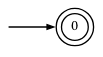</img>
- `ε` is recognized by an automaton with a single initial and final state.

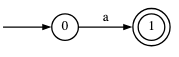</img>
- `a` for `a ∈ Σ` is recognized by an automaton with a single transition on `a`.

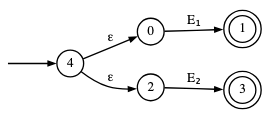</img>
- `E₁ | E₂` is recognized by an automaton with ε-transitions to the initial states of the automata of `E₁` and `E₂`.

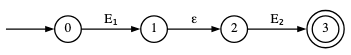</img>
- `E₁ E₂` is recognized by an automaton with ε-transitions from the final states of the automaton of `E₁` to the initial states of the automaton of `E₂`.

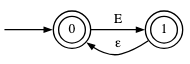</img>
- `E*` is recognized by an automaton with ε-transitions from the final states to the initial states of the automaton of `E`; the initial state is made final.

This construction involves merging transition functions. If `γ` and `δ` are transition functions on disjoint states, then their union `γ ∪ δ` (or `|` in Python) is taken. Otherwise,
- `γ q` is taken for states `q` for which only `γ` is defined;
- `δ q` is taken for states `q` for which only `δ` is defined;
- For states `q` in which both `γ` and `δ` are defined, further case analysis is necessary:
  - `γ q a` is taken for inputs `a` for which only `γ q` is defined;
  - `δ q a` is taken for inputs `a` for which only `δ q` is defined;
  - `γ q a ∪ δ q a` is taken for inputs `a` for which both `γ q` and `δ q` are defined.
The Python implementation avoids the last case analysis by making `γ[q][a]` and `δ[q][a]` return the empty set if `a` is not in the respective domains:

In [ ]:
def merge(γ: TransFunc, δ: TransFunc) -> TransFunc:
  return (
    {q: γ[q] for q in γ.keys() - δ.keys()}
    | {q: δ[q] for q in δ.keys() - γ.keys()}
    | {q: {a: γ[q].get(a, set()) | δ[q].get(a, set()) for a in γ[q].keys() | δ[q].keys()} for q in γ.keys() & δ.keys()}
  )

For example:

In [ ]:
γ = {0: {'a': {3, 4}}, 1: {'a': {5}}}
δ = {0: {'a': {6}, 'b': {7}}}
assert merge(γ, δ) == {0: {'a': {3, 4, 6}, 'b': {7}}, 1: {'a': {5}}}

The Python implementation below implements this construction. Each state is assigned a unique number by incrementing a counter, `QC`, with the next state's number.

In [ ]:
def RegExToFSA(re) -> FiniteStateAutomaton:
  def ToFSA(re) -> FiniteStateAutomaton:
    nonlocal QC
    match re:
      case ε():
        q = QC
        QC += 1
        return FiniteStateAutomaton(set(), {q}, {q}, {}, {q})
      case Sym(a=a):
        q = QC
        QC += 1
        r = QC
        QC += 1
        return FiniteStateAutomaton({a}, {q, r}, {q}, {q: {a: {r}}}, {r})
      case Choice(E1=E1, E2=E2):
        A1, A2 = ToFSA(E1), ToFSA(E2)
        q = QC
        QC += 1
        δ = A1.δ | A2.δ | {q: {'ε': A1.I | A2.I}}
        return FiniteStateAutomaton(A1.Σ | A2.Σ, A1.Q | A2.Q | {q}, {q}, δ, A1.F | A2.F)
      case Conc(E1=E1, E2=E2):
        A1, A2 = ToFSA(E1), ToFSA(E2)
        δ = merge(A1.δ | A2.δ, {q: {'ε': A2.I} for q in A1.F})
        return FiniteStateAutomaton(A1.Σ | A2.Σ, A1.Q | A2.Q, A1.I, δ, A2.F)
      case Star(E=E):
        A = ToFSA(E)
        δ = merge(A.δ, {q: {'ε': A.I} for q in A.F})
        return FiniteStateAutomaton(A.Σ, A.Q, A.I, δ, A.I | A.F)
      case E:
        raise Exception(str(E) + ' not a regular expression')

  QC = 0
  return ToFSA(re)

For example, revisiting `E₁ = (ab)*|c`:

In [ ]:
RegExToFSA(E1).draw()

**Question.** What is a finite state automaton for `((a|b)c)*`? What is one for `ab|ac`? Analyze the results of applying `RegExToFSA`!

In [ ]:
E2 = Star(Conc(Choice(Sym('a'), Sym('b')), Sym('c')))
A2 = RegExToFSA(E2)
A2.draw()

In [ ]:
E3 = Choice(Conc(Sym('a'), Sym('b')), Conc(Sym('a'), Sym('c')))
A3 = RegExToFSA(E3)
A3.draw()

Note that there are two possible transitions from the initial state.

### Determinization

For finite state automaton `A = (Σ, Q, I, δ, F)`, we can construct an equivalent, deterministic finite state automaton `A' = (Σ, Q', I', δ', F')` over the same symbols `Σ` by the _subset construction_ algorithm, called so as the states `Q'` become sets of states of `Q`. The algorithm iteratively visits all states of `Q` and adds states to `Q'` by merging states of `Q`, and adds transitions to `δ'` by transforming those of `δ`:

```
procedure determinize(A: FiniteStateAutomaton) → FiniteStateAutomaton
    I' := {A.I}
    Q', δ', V := {I'}, {}, {}
    while Q' ≠ V do
        q' :∈ Q' – V ; V := V ∪ {q'}
        for a ∈ A.Σ do
            r' := A.δ̂ q' a
            if r' ≠ {} then Q' := Q' ∪ {r'}; δ' q' a := r'
    F' := {q' ∈ Q' | q' ∩ A.F ≠ ∅}
    return (A.Σ, Q', I', δ', F')
```

The nondeterministic assignment `x :∈ S` assigns to `x` an arbitrary element of set `S`.

<img style="width:18em;float:right" src="./img/nfa.svg"/>

Applied to the example, `q'₀` becomes `{0}`. Variables `δ'`, `V'`, `visited` successively become:

| `Q'`                      | `δ'`               | `V`        |
|:--------------------------|:-------------------|:-----------|
| `{{0}}`                   | `{}`               | `{}`       |
| `{{0}, {1, 2}}`           | `{{0} a → {1, 2}}` | `{{0}}`    |
| `{{0}, {1, 2}, {3}, {4}}` | `{{0} a → {1, 2}, {1, 2} a → {1, 2}, {1, 2} b → {3}, {1, 2} c → {4}}` | `{{0}, {1, 2}}` |
| `{{0}, {1, 2}, {3}, {4}}` | `{{0} a → {1, 2}, {1, 2} a → {1, 2}, {1, 2} b → {3}, {1, 2} c → {4}}` | `{{0}, {1, 2}, {3}}` |
| `{{0}, {1, 2}, {3}, {4}}` | `{{0} a → {1, 2}, {1, 2} a → {1, 2}, {1, 2} b → {3}, {1, 2} c → {4}}` | `{{0}, {1, 2}, {3}, {4}}` |

<img style="width:18em;float:right" src="./img/dfa.svg"/>

In the second last step, `{3}` or `{4}` can be visited first. Finally, `F'` becomes `{{3}, {4}}`.

**Question.** What are the steps in making the finite state automaton accepting `ab|ac` deterministic?

*Answer.*

The finite state automaton has `Q = {0, 1, 2, 3, 4}`, `I = {0}`, `F = {2, 4}` and has transition function `δ` with `0 a → 1`, `0 a → 3`, `1 b → 2`, `3 c → 4` according to `A₃` above. Then `q'₀` becomes `{0}` and `Q'`, `δ'`, `V` successively become:


| `Q'`                      | `δ'`               | `V`        |
|:--------------------------|:-------------------|:-----------|
| `{{0}}`                   | `{}`               | `{}`       |
| `{{0}, {1, 3}}`           | `{{0} a → {1, 3}}` | `{{0}}`    |
| `{{0}, {1, 3}, {2}, {4}}` | `{{0} a → {1, 3}, {1, 3} b → {2}, {1, 3} c → {4}}` | `{{0}, {1, 3}}` |
| `{{0}, {1, 3}, {2}, {4}}` | `{{0} a → {1, 3}, {1, 3} b → {2}, {1, 3} c → {4}}` | `{{0}, {1, 3}, {4}}` |
| `{{0}, {1, 3}, {2}, {4}}` | `{{0} a → {1, 3}, {1, 3} b → {2}, {1, 3} c → {4}}` | `{{0}, {1, 3}, {2}, {4}}` |

In the second last step, either `{2}` or `{4}` would be visited first. Finally, `F'` becomes `{{2}, {4}}`.

In general, if the number of states of `A` is `n`, then `A'` will have at most `2ⁿ` states. The resulting deterministic finite state automaton does not require backtracking. The subset construction trades exponential run-time (in the length of the input) for exponential memory (in the size of the original automaton).

The implementation of the subset construction in Python follows closely the algorithm. As Python does not allow sets of sets, `frozenset` is used for the new states (elements of sets have to have a hash method defined to allow fast checking of membership; the hash method is only defined for immutable data types like `str` and `frozenset` but sets are mutable):

In [ ]:
def determinize(A: FiniteStateAutomaton, log=False) -> FiniteStateAutomaton:
  Iʹ = fset({ε_closure(A.I, A.δ)})
  Qʹ, δʹ, V = set(Iʹ), {}, set()
  if log:
    print(Iʹ, Qʹ, δʹ, V)
  while Qʹ != V:
    qʹ = (Qʹ - V).pop()
    V |= {qʹ}
    for a in A.Σ:
      rʹ = ε_closure(δ̂(A.δ, qʹ, a), A.δ)
      if rʹ != set():
        Qʹ |= {rʹ}
        δʹ = merge(δʹ, {qʹ: {a: {rʹ}}})
    if log:
      print(Qʹ, δʹ, V)
  Fʹ = {qʹ for qʹ in Qʹ if qʹ & A.F != set()}
  return FiniteStateAutomaton(A.Σ, Qʹ, Iʹ, δʹ, Fʹ)

For example:

In [ ]:
A0 = parseFSA("""
0
2
0 a → 1
1 a → 0
1 a → 2
""")
A0.draw()

In [ ]:
A0det = determinize(A0, True)
A0det.draw()

Continuing with `E₃ = ab|ac`:

In [ ]:
E3 = Choice(Conc(Sym('a'), Sym('b')), Conc(Sym('a'), Sym('c')))
A3 = RegExToFSA(E3)
A3.draw()

In [ ]:
A3det = determinize(A3)
A3det.draw()

As another example, let us revisit `aa*b|aa*c`

In [ ]:
E4 = Choice(Conc(Conc(Sym('a'), Star(Sym('a'))), Sym('b')), Conc(Conc(Sym('a'), Star(Sym('a'))), Sym('c')))
A4 = RegExToFSA(E4)
A4.draw()

In [ ]:
A4det = determinize(A4)
A4det.draw()

With readability and efficiency in mind, the states of a (deterministic or nondeterministic) finite state automaton can be _renamed_ by numbering them `0`, `1`, etc. A mapping `m` is constructed that maps the original names to the new names. The function `rename` traverses all states breadth-first, starting from the set of initial states. Thus, *unreachable* states are not visited:

In [ ]:
def rename(A: FiniteStateAutomaton) -> FiniteStateAutomaton:
  m, c = {}, 0
  W, V = A.I, set()
  while W != set():
    for q in W:
      m[q] = c
      c += 1
    W, V = setunion(ε_closure(δ̂(A.δ, W, a), A.δ) for a in A.Σ) - W, V | W
  Qʹ = {i for i in range(c)}
  Iʹ = {m[q] for q in A.I}
  δʹ = {m[q]: {a: {m[r] for r in A.δ[q][a]} for a in A.δ[q]} for q in A.δ}
  Fʹ = {m[q] for q in A.F}
  return FiniteStateAutomaton(A.Σ, Qʹ, Iʹ, δʹ, Fʹ)

In [ ]:
A4simp = rename(A4det)
A4simp.draw()

### Minimizing a Finite State Automaton

For a deterministic finite state automaton `A`, an equivalent _minimal_ and deterministic finite state automaton `Aʹ` over the same symbols can be constructed by "merging" equivalent states of `A`. The resulting automaton has the least possible number of states and is unique up to the naming of the states.

The algorithm partitions states into equivalence classes, starting with the coarsest partitioning and refining it as needed. Initially, it is assumed that only the final and non-final states are distinct, i.e., only two equivalence classes exist. The algorithm uses the transition function `δ`: two states, say `q`, `r`, become not equivalent if on some symbol `a`,
- `δ q a` is defined and `δ r a` is not, or vice versa, or
- both `δ q a` and `δ r a` are defined and return states that were previously identified as not equivalent.

This is repeated until no two states can be further distinguished.

<img style="width:24em;float:right" src="./img/A4simpMin1.svg"/>

<div style="float:left;border-right:20px solid white">

|     | `0` | `1` | `2` | `3` | `4` |
|:---:|:---:|:---:|:---:|:---:|:---:|
| `0` | `X` | `X` |     |     | `X` |
| `1` | `X` | `X` |     |     | `X` |
| `2` |     |     | `X` | `X` |     |
| `3` |     |     | `X` | `X` |     |
| `4` | `X` | `X` |     |     | `X` |

</div>

Consider the automaton to the right (similar to `A4simp`). A table is used to show which states are distinguished. Initially, `2` and `3`, the final states, are distinguished from all other states, indicated by `X`.

<img style="width:24em;float:right" src="./img/A4simpMin2.svg"/>

<div style="float:left;border-right:20px solid white">

|     | `0` | `1` | `2` | `3` | `4` |
|:---:|:---:|:---:|:---:|:---:|:---:|
| `0` | `X` |     |     |     |     |
| `1` |     | `X` |     |     | `X` |
| `2` |     |     | `X` | `X` |     |
| `3` |     |     | `X` | `X` |     |
| `4` |     | `X` |     |     | `X` |

</div>

Going over all pairs of non-distinguished states, the first round
- distinguishes `0` from `1`, as there are transitions on `b` and `c` in `1` but not in `0`;
- distinguishes `0` from `4`, for the same reason;
- does not distinguish `1` and `4`, as both have transitions on `a`, `b`, and `c`, and these transitions go to states that are not distinguished;
- does not distinguish `2` and `3`, as neither has transitions.

The next round does not distinguish any more states, so the process stops; `1` and `3` are equivalent, and so are `2` and `4`:
- does not distinguish `1` and `4`, for the same reason as above;
- does not distinguish `2` and `3`, for the same reason as above.

The partitioning is `{0}`, `{1, 4}`, and `{2, 3}`. For each of the equivalence classes, we pick a *representative*, say `0`, `1`, `2`, which become the new states. The new transitions then become:

  `0 a → 1`  
  `1 a → 1`  
  `1 b → 2`  
  `1 c → 2`  

The new initial state is `0`, and the final state is `2`.

In the _minimization algorithm_, the table is represented as a set of pairs, `eq`, which is modified only by adding pairs. New states `Qʹ` are sets of old states that, according to `eq`, are equivalent. The partitioning `prt` and the representatives `rep` of the equivalence classes are also constructed. The notation `{x ↦ y}` stands for a function that maps `x` to `y`. The function `some(s)` chooses an arbitrary element from the set `s`. If `s` has only a single element, it returns that element. As `A` must be deterministic, the algorithm first converts `A.δ: A.Q ↛ A.Σ ↛ 𝒫A.Q` into `δ: A.Q ↛ A.Σ ↛ A.Q`, i.e., `δ q a` is a state rather than a set of states:

```
procedure minimize(A: FiniteStateAutomaton) → FiniteStateAutomaton
    δ := {q ↦ {a ↦ some(A.δ q a) | a ∈ dom A.δ q} | q ∈ dom A.δ}
    eq := {(q, r) | q, r ∈ A.Q, (q ∈ A.F) = (r ∈ A.F)}
    done := false
    while ¬done do
        done := true
        for q, r ∈ dom δ × dom δ do
            if (q, r) ∈ eq ∧ (q ∈ dom δ ≠ r ∈ dom δ ∨ dom(δ q) ≠ dom(δ r) ∨
                (∃ a ∈ dom(δ q) • (δ q u, δ r u) ∉ eq)) then
                eq := eq - {(q, r)} ; done := false
    prt := {{q} ∪ {r | r ∈ A.Q, (q, r) ∈ eq} | q ∈ A.Q}
    rep = {q ↦ some(qʹ) | qʹ ∈ prt, q in qʹ}
    δʹ := {q ↦ {a ↦ {rep(δ q a)} | a ∈ dom δ q} | q ∈ ran rep, q ∈ δ}
    Iʹ := {rep q | q ∈ A.I}
    Fʹ := {rep q | q ∈ A.F}
    return FiniteStateAutomaton(A.Σ, ran rep, Iʹ, δʹ, Fʹ)
```

The Python implementation closely follows the algorithm. If `s` is a set with a single element, the Python expression `list(s)[0]` returns that element. For non-empty set `s`, the statement `s.pop()` returns an arbitrary element and removes it from `s`. If that is not desired, as below, a copy of `s` is made, `set(s).pop()`:

In [ ]:
def minimize(A: FiniteStateAutomaton, log=False) -> FiniteStateAutomaton:
  δ = {q: {a: list(A.δ[q][a])[0] for a in A.δ[q]} for q in A.δ}
  if log:
    print('δ =', δ)
  eq = {(q, r) for q in A.Q for r in A.Q if (q in A.F) == (r in A.F)}
  done = False
  while not done:
    if log:
      print('eq = ', sorted(eq))
    done = True
    for q in δ:
      for r in δ:
        if (q, r) in eq and (
          (q in δ) != (r in δ) or (δ[q].keys() != δ[r].keys()) or any((δ[q][a], δ[r][a]) not in eq for a in δ[q])
        ):
          eq -= {(q, r)}
          done = False
  prt = {fset({q} | {r for r in A.Q if (q, r) in eq}) for q in A.Q}
  if log:
    print('prt = ', prt)
  rep = {q: set(qʹ).pop() for qʹ in prt for q in qʹ}
  if log:
    print('rep = ', rep)
  δʹ = {q: {a: {rep[δ[q][a]]} for a in δ[q]} for q in rep.values() if q in δ}
  Iʹ = {rep[q] for q in A.I}
  Fʹ = {rep[q] for q in A.F}
  return FiniteStateAutomaton(A.Σ, rep.values(), Iʹ, δʹ, Fʹ)

Let us minimize `A₄`, the automaton accepting `aa*b|aa*c`:

In [ ]:
A4simp.draw()

In [ ]:
A4min = minimize(A4simp, True)
A4min.draw()

We expect that all versions of `A₄` are equivalent: 

In [ ]:
assert equiv(A4, A4det) and equiv(A4, A4simp) and equiv(A4, A4min)

**Question.** Consider `A₅` below. What is the accepted language? Minimize `A₅`!

In [ ]:
A5 = parseFSA("""
0
1 4
0 a → 1
1 a → 2
2 a → 3
3 a → 4
4 a → 5
5 a → 0
""")
A5.draw()

*Answer.* The language is the set of all sequences over `a` of length 1, 4, 7, 10, ..., i.e. multiples of 3 plus 1. Minimization results in:

In [ ]:
minimize(A5).draw()

### Equality of Regular Expressions

Checking the equivalence of two regular expressions can be reduced to checking the equivalence of two finite-state automata by first converting the regular expressions to finite-state automata and then making them deterministic. Following checks if `ac | bc` is the same as `(a | b) c`:

In [ ]:
E7 = Choice(Conc(Sym('a'), Sym('c')), Conc(Sym('b'), Sym('c')))  # ac | bc
A7 = RegExToFSA(E7)
A7.draw()

In [ ]:
E8 = Conc(Choice(Sym('a'), Sym('b')), Sym('c'))  # (a | b) c
A8 = RegExToFSA(E8)
A8.draw()

In [ ]:
assert equiv(A7, A8)

Let us define `equalRegEx(E1, E2)` as follows:

In [ ]:
def equalRegEx(E1: RegEx, E2) -> bool:
  A1, A2 = RegExToFSA(E1), RegExToFSA(E2)
  return equiv(A1, A2)

For example, `[a a*] = a*`:

In [ ]:
assert equalRegEx(Choice(Conc(Sym('a'), Star(Sym('a'))), ε()), Star(Sym('a')))

**Question.** How can you simplify `(a|b*)*`? Make a guess and check it!

*Answer.* This can be simplified to `(a|b)*`:

In [ ]:
E = Star(Choice(Sym('a'), Star(Sym('b'))))
F = Star(Choice(Sym('a'), Sym('b')))
assert equalRegEx(E, F)

### Finite State Automaton to Regular Grammar

For every (deterministic or nondeterministic) finite state automaton `A`, an equivalent regular grammar `G` over the same symbols can be constructed, `L(A) = L(G)`.

<img style="width:18em;float:right;margin-left:2em" src="./img/A13.svg"/>

For example, for the automaton to the right, a regular grammar is `G = (T, N, P, S)` with `T = {a, b, c}`, `N = {0, 1, 2, 3}`, `S = 0`, and `P` consisting of:

  `0 → a 1`  
  `0 → c 3`  
  `0 → ε`  
  `1 → b 2`  
  `2 → a 1`  
  `2 → ε`  
  `3 → ε`

In general, a grammar `G = (T, N, P, S)` that is equivalent to `A = (Σ, Q, {q₀}, δ, F)` is:
- `T = Σ`
- `N = Q`
- `P = {q → t r | q t → r ∈ δ} ∪ {q → ε | q ∈ F)`
- `S = q₀`

<img style="width:16em;float:right;margin-top:-.5em;margin-bottom:-.5em" src="./img/nfa.svg"></img>

**Question.** What is an equivalent grammar for the automaton to the right?

_Answer._ An equivalent regular grammar is `G = (T, N, P, S)` with `T = {a, b}`, `N = {0, 1, 2, 3, 4}`, `S = 0`, and `P` consisting of:  

    0 → a 1
    0 → a 2
    1 → a 1
    1 → b 3
    2 → a 2
    2 → c 4
    3 → ε 
    4 → ε

To summarize,
- from every regular grammar, an equivalent regular expression can be constructed,
- from every regular expression, an equivalent finite state automaton can be constructed, and
- from every finite state automaton, an equivalent regular grammar can be constructed.

That is, all three define the same set of languages, the _regular languages_. They are particularly interesting since _deterministic acceptors with finite states_ can be constructed for them. These acceptors run in time linear to the length of the input.

Acceptors with finite states cannot generally be constructed for larger classes of languages, like context-free languages.

### Historic Notes and Further Reading

Nondeterminism arises in programming languages with concurrency, abstracting from the specifics of scheduling on single or multiple processors (e.g. "Threads can write the variable in any order"). Nondeterminism also arises as abstractions in sequential programs (e.g. "An arbitrary element of the set is removed"). This is expressed through guarded commands or, more generally, through nondeterministic assignments like `x :∈ S`. This kind of nondeterminism is called _demonic_ as the programmer must be prepared for an arbitrary choice. By contrast, the nondeterminism of finite state automata is called _angelic_ as it will accept an input whenever some choice between nondeterministic transitions exists. Demonic nondeterminism can be implemented by making an arbitrary choice, and angelic nondeterminism can only be through backtracking. Finite state automata are sometimes called *finite state machines*; we use the term finite state automata to distinguish them from finite state machines with demonic nondeterminism.

### Bibliography

<div class="cite2c-biblio"></div>

<div class="cite2c-biblio"></div>